In [11]:
import numpy as np

from keras.datasets import reuters
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.preprocessing.text import Tokenizer

import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
(XTrain, YTrain),(XTest, YTest) = reuters.load_data(num_words=None, test_split=0.3)

In [13]:
WordIndex = reuters.get_word_index(path="reuters_word_index.json")

print(len(WordIndex))

IndexToWord = {}
for key, value in WordIndex.items():
    IndexToWord[value] = key

print(' '.join([IndexToWord[x] for x in XTrain[1]]))
print(YTrain[1])

MaxWords = 10000

# Tokenization of words.
Tok = Tokenizer(num_words=MaxWords)
XTrain = Tok.sequences_to_matrix(XTrain, mode='binary')
XTest = Tok.sequences_to_matrix(XTest, mode='binary')

# Preprocessing of labels
NumClasses = max(YTrain) + 1
YTrain = to_categorical(YTrain, NumClasses)
YTest = to_categorical(YTest, NumClasses)

print(XTrain[1])
print(len(XTrain[1]))

30979
the termination payment airport takes 6 visibility geological 3 6 602 begin up said fully bank expects commodity total is giant a recreation this takes leroy series termination payment airport mln a for capital 1 pre 50 american east said in council takes leroy recommend's france a but u any 4 s 1st losses pct dlrs
4
[0. 1. 0. ... 0. 0. 0.]
10000


In [14]:
model = Sequential()
model.add(Dense(512, input_shape=(MaxWords,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(NumClasses))
model.add(Activation('softmax'))
model.summary()

model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 512)               5120512   
                                                                 
 activation_2 (Activation)   (None, 512)               0         
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 46)                23598     
                                                                 
 activation_3 (Activation)   (None, 46)                0         
                                                                 
Total params: 5144110 (19.62 MB)
Trainable params: 5144110 (19.62 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
______________

In [15]:
history = model.fit(XTrain, YTrain, 
                    validation_data=(XTest, YTest), 
                    epochs=10, 
                    batch_size=32)

Epoch 1/10


2024-02-27 05:00:28.715236: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 314360000 exceeds 10% of free system memory.


246/246 [==============================] - 6s 22ms/step - loss: 1.2933 - accuracy: 0.7155 - val_loss: 0.9098 - val_accuracy: 0.7967
Epoch 2/10
246/246 [==============================] - 5s 22ms/step - loss: 0.5003 - accuracy: 0.8885 - val_loss: 0.8158 - val_accuracy: 0.8148
Epoch 3/10
246/246 [==============================] - 5s 22ms/step - loss: 0.2765 - accuracy: 0.9388 - val_loss: 0.8799 - val_accuracy: 0.8091
Epoch 4/10
246/246 [==============================] - 5s 22ms/step - loss: 0.2236 - accuracy: 0.9505 - val_loss: 0.9197 - val_accuracy: 0.8044
Epoch 5/10
246/246 [==============================] - 5s 22ms/step - loss: 0.2065 - accuracy: 0.9527 - val_loss: 0.9502 - val_accuracy: 0.8017
Epoch 6/10
246/246 [==============================] - 6s 23ms/step - loss: 0.1990 - accuracy: 0.9543 - val_loss: 1.0314 - val_accuracy: 0.7946
Epoch 7/10
246/246 [==============================] - 5s 22ms/step - loss: 0.1947 - accuracy: 0.9538 - val_loss: 1.0269 - val_accuracy: 0.8002
Epoch 8/10

In [16]:
Scores = model.evaluate(XTest, YTest, verbose=1)
print('Test loss:', Scores[0])
print('Test accuracy:', Scores[1])

 14/106 [==>...........................] - ETA: 0s - loss: 1.0843 - accuracy: 0.7969

106/106 [==============================] - 0s 4ms/step - loss: 1.0472 - accuracy: 0.8068
Test loss: 1.0471566915512085
Test accuracy: 0.8067675828933716


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


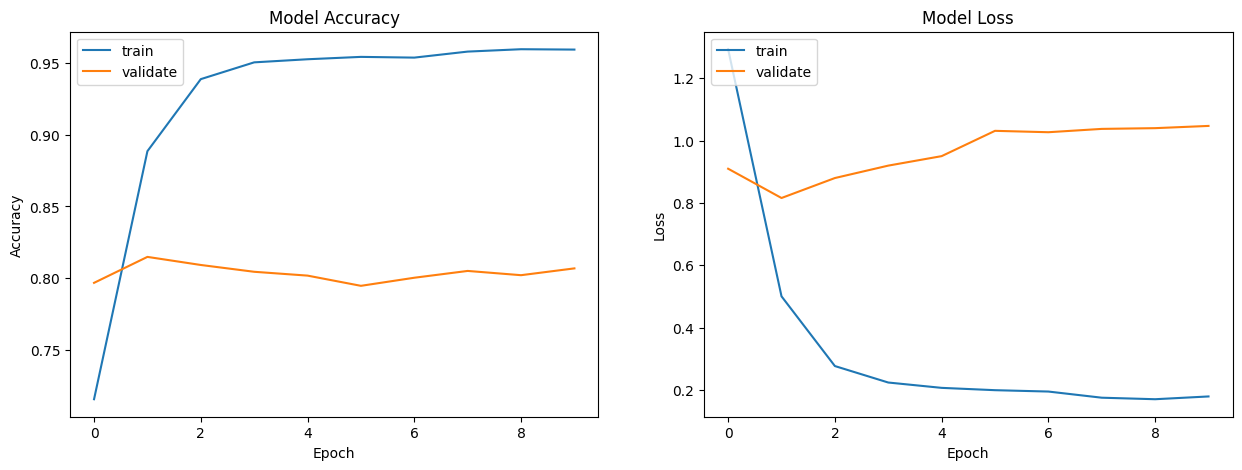

In [17]:
def plotmodelhistory(history): 
    fig, axs = plt.subplots(1,2,figsize=(15,5)) 
    # summarize history for accuracy
    axs[0].plot(history.history['accuracy']) 
    axs[0].plot(history.history['val_accuracy']) 
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy') 
    axs[0].set_xlabel('Epoch')
    axs[0].legend(['train', 'validate'], loc='upper left')
    # summarize history for loss
    axs[1].plot(history.history['loss']) 
    axs[1].plot(history.history['val_loss']) 
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss') 
    axs[1].set_xlabel('Epoch')
    axs[1].legend(['train', 'validate'], loc='upper left')
    plt.show()

# list all data in history
print(history.history.keys())

plotmodelhistory(history)